# Model evaluation on Insurance Data - Aditya - GCD - Term 2

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Random Forest Classifier](#section4)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using accuracy score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br>
    - 5.3 [Model evaluation using precision score](#section503)<br>
    - 5.4 [Model evaluation using recall score](#section504)<br>
    - 5.5 [Model evaluation using f1_score](#section505)<br>
    - 5.6 [Model evaluation using ROC_AUC curve](#section506a)<br>
    - 5.7 [Choosing better model using precision score](#section5.7)<br>

<a id = section1></a>

## 1. Problem Statement

Given the dataset containing __Life Insurance Data__, use multiple models to predict the response which is a measure of risk in 8 level. Evaluate the model using possible __model evaluation techniques__. 

Steps to be followed:
a. Data Cleaning and EDA.
b. Try out various machine learning models using train test and model evaluation
techniques and choose the best model for output prediction. You may also use
RandomisedSearchCV or GridSearchCV for hyperparameter tuning of the
estimator at your own discretion.

<a id = section2></a>

## 2. Data Loading and Description

Insurance has become an indispensable part of our lives in recent years and people are paying more attention on it. For this project, the data comes from prudential life insurance on kaggle with over a hundred variables describing attributes of life insurance applicants. The challenge part for them is that the application process time is antiquated and the goal for this project is to help them to enhance the efficiency of processing time as well as reduce labor intensive for new and existing customers.
The task is to accurately predict the "Response" variable for each Id in the test set. "Response" is an ordinal measure of risk that has 8 levels.
##### We need to decide the best model for predicting the same by comparing various ML models.

The dataset consists of __59K rows__.<br/>
Below is a table having brief description of features present in the dataset.

# Data fields


|Variable   |	Description                                               |
|---------------------------------| --------------------------------------------------------| 
| Id	                          |   A unique identifier associated with an application.|
| Product_Info_1-7                | A set of normalized variables relating to the product applied for  |
| Ins_Age | Normalized age of applicant|
| Ht | Normalized height of applicant |
| Wt | Normalized weight of applicant |
| BMI | Normalized BMI of applicant |
| Employment_Info_1-6 | A set of normalized variables relating to the employment history of the applicant. |
| InsuredInfo_1-6 | A set of normalized variables providing information about the applicant. |
| Insurance_History_1-9 | A set of normalized variables relating to the insurance history of the applicant. |
| Family_Hist_1-5 | A set of normalized variables relating to the family history of the applicant. |
| Medical_History_1-41 | A set of normalized variables relating to the medical history of the applicant. |
| Medical_Keyword_1-48 | A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application. |
| Response	| This is the target variable, an ordinal variable relating to the final decision associated with an application |

The following variables are all __categorical (nominal)__:

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41

The following variables are __continuous__:

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

The following variables are __discrete__:

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

Medical_Keyword_1-48 are __dummy variables__.


__Importing Packages__

In [241]:
from collections import Counter

import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#### Importing the Dataset

In [242]:
insurance = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv')
insurance.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


<a id = section3></a>

## 3. Exploratory Data Analysis

#### Check the shape of the dataset

In [243]:
insurance.shape

(59381, 128)

#### Check the columns present in the dataset

In [244]:
insurance.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

#### Check the descriptive statistics of the dataset

In [245]:
insurance.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


#### Check the info of the dataset

In [246]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


#### Check the missing values present in the dataset. 

In [247]:
insurance.isnull().sum()[insurance.isnull().sum() !=0]

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

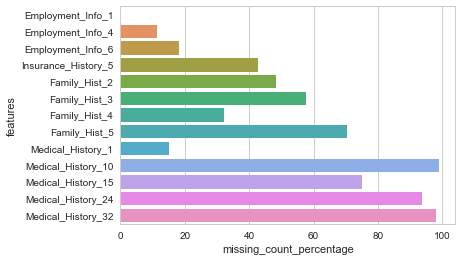

In [248]:
missing = insurance.isnull().sum()[insurance.isnull().sum() !=0]
missing = pd.DataFrame(missing.reset_index())
missing.rename(columns={'index':'features',0:'missing_count'}, inplace = True)
missing['missing_count_percentage'] = ((missing['missing_count'])/insurance.shape[0])*100
plt.figure()
sns.barplot(y = missing['features'], x = missing['missing_count_percentage'])

#### Impute the missing values - Analyze the outliers to choose either Median or Mean

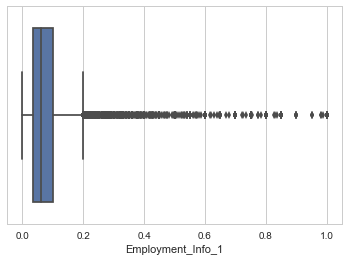

In [249]:
plt.plot(figsize=(15,10))
sns.boxplot(insurance['Employment_Info_1'])

In [250]:
# Employment_Info_1 has lots of outliers - Median
insurance['Employment_Info_1'].fillna(insurance['Employment_Info_1'].median(),inplace=True) 

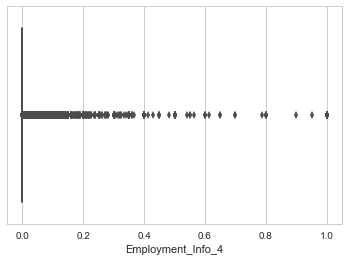

In [251]:
sns.boxplot(insurance['Employment_Info_4'])

In [252]:
# Employment_Info_4 has most of the values centered close to zero, huge presence of outliers 
insurance['Employment_Info_4'].fillna(insurance['Employment_Info_4'].median(),inplace=True)

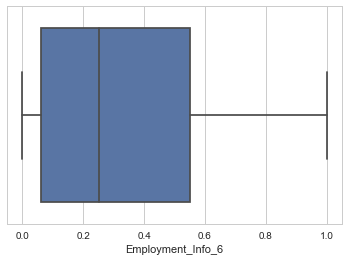

In [253]:
sns.boxplot(insurance['Employment_Info_6'])

In [254]:
# Employment_Info_6 has no outliers - Mean should do the job here
insurance['Employment_Info_6'].fillna(insurance['Employment_Info_6'].mean(),inplace=True)

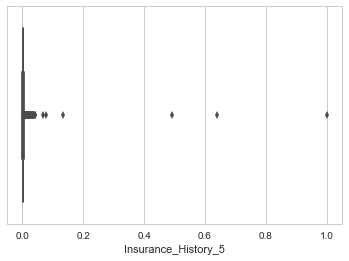

In [255]:
# Though Insurance_History_5 has high number of missing values, instead of dropping it, let us impute as this is insurance dataset
sns.boxplot(insurance['Insurance_History_5'])

In [256]:
# Insurance_History_5 also has most of the values centered close to zero, huge presence of outliers 
insurance['Insurance_History_5'].fillna(insurance['Insurance_History_5'].median(),inplace=True)

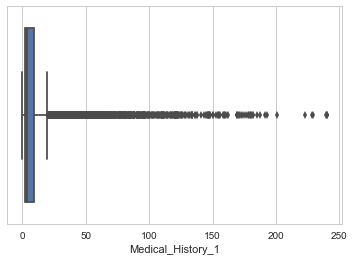

In [257]:
sns.boxplot(insurance['Medical_History_1'])

In [258]:
# Medical_History_1 also has presence of outliers with majority of data from 20 - 150
insurance['Medical_History_1'].fillna(insurance['Medical_History_1'].median(),inplace=True)

In [259]:
#lets drop 8 columns with very high number of missing values 
insurance.drop(['Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5'], axis=1, inplace = True)

In [260]:
insurance.isnull().sum()[insurance.isnull().sum() !=0]

Series([], dtype: int64)

### There is one Column which has string type data, let us convert it into numeric data

In [261]:
insurance['Product_Info_2'].unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

In [262]:
le = LabelEncoder()
insurance['Product_Info_2'] = le.fit_transform(insurance['Product_Info_2'])

In [263]:
insurance.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,16,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,0,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,18,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,17,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,15,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


## Some actual EDA on the data set to understand more

In [264]:
CATEGORICAL_COLUMNS = ["Product_Info_1", "Product_Info_2", "Product_Info_3", "Product_Info_5", "Product_Info_6",\
                       "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1",\
                       "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",\
                       "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", "Insurance_History_7",\
                       "Insurance_History_8", "Insurance_History_9", "Family_Hist_1"]

CONTINUOUS_COLUMNS = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI",
                      "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                      "Insurance_History_5"]

MEDICAL_COLUMNS = ["Medical_Keyword_{}".format(i) for i in range(1, 48)]

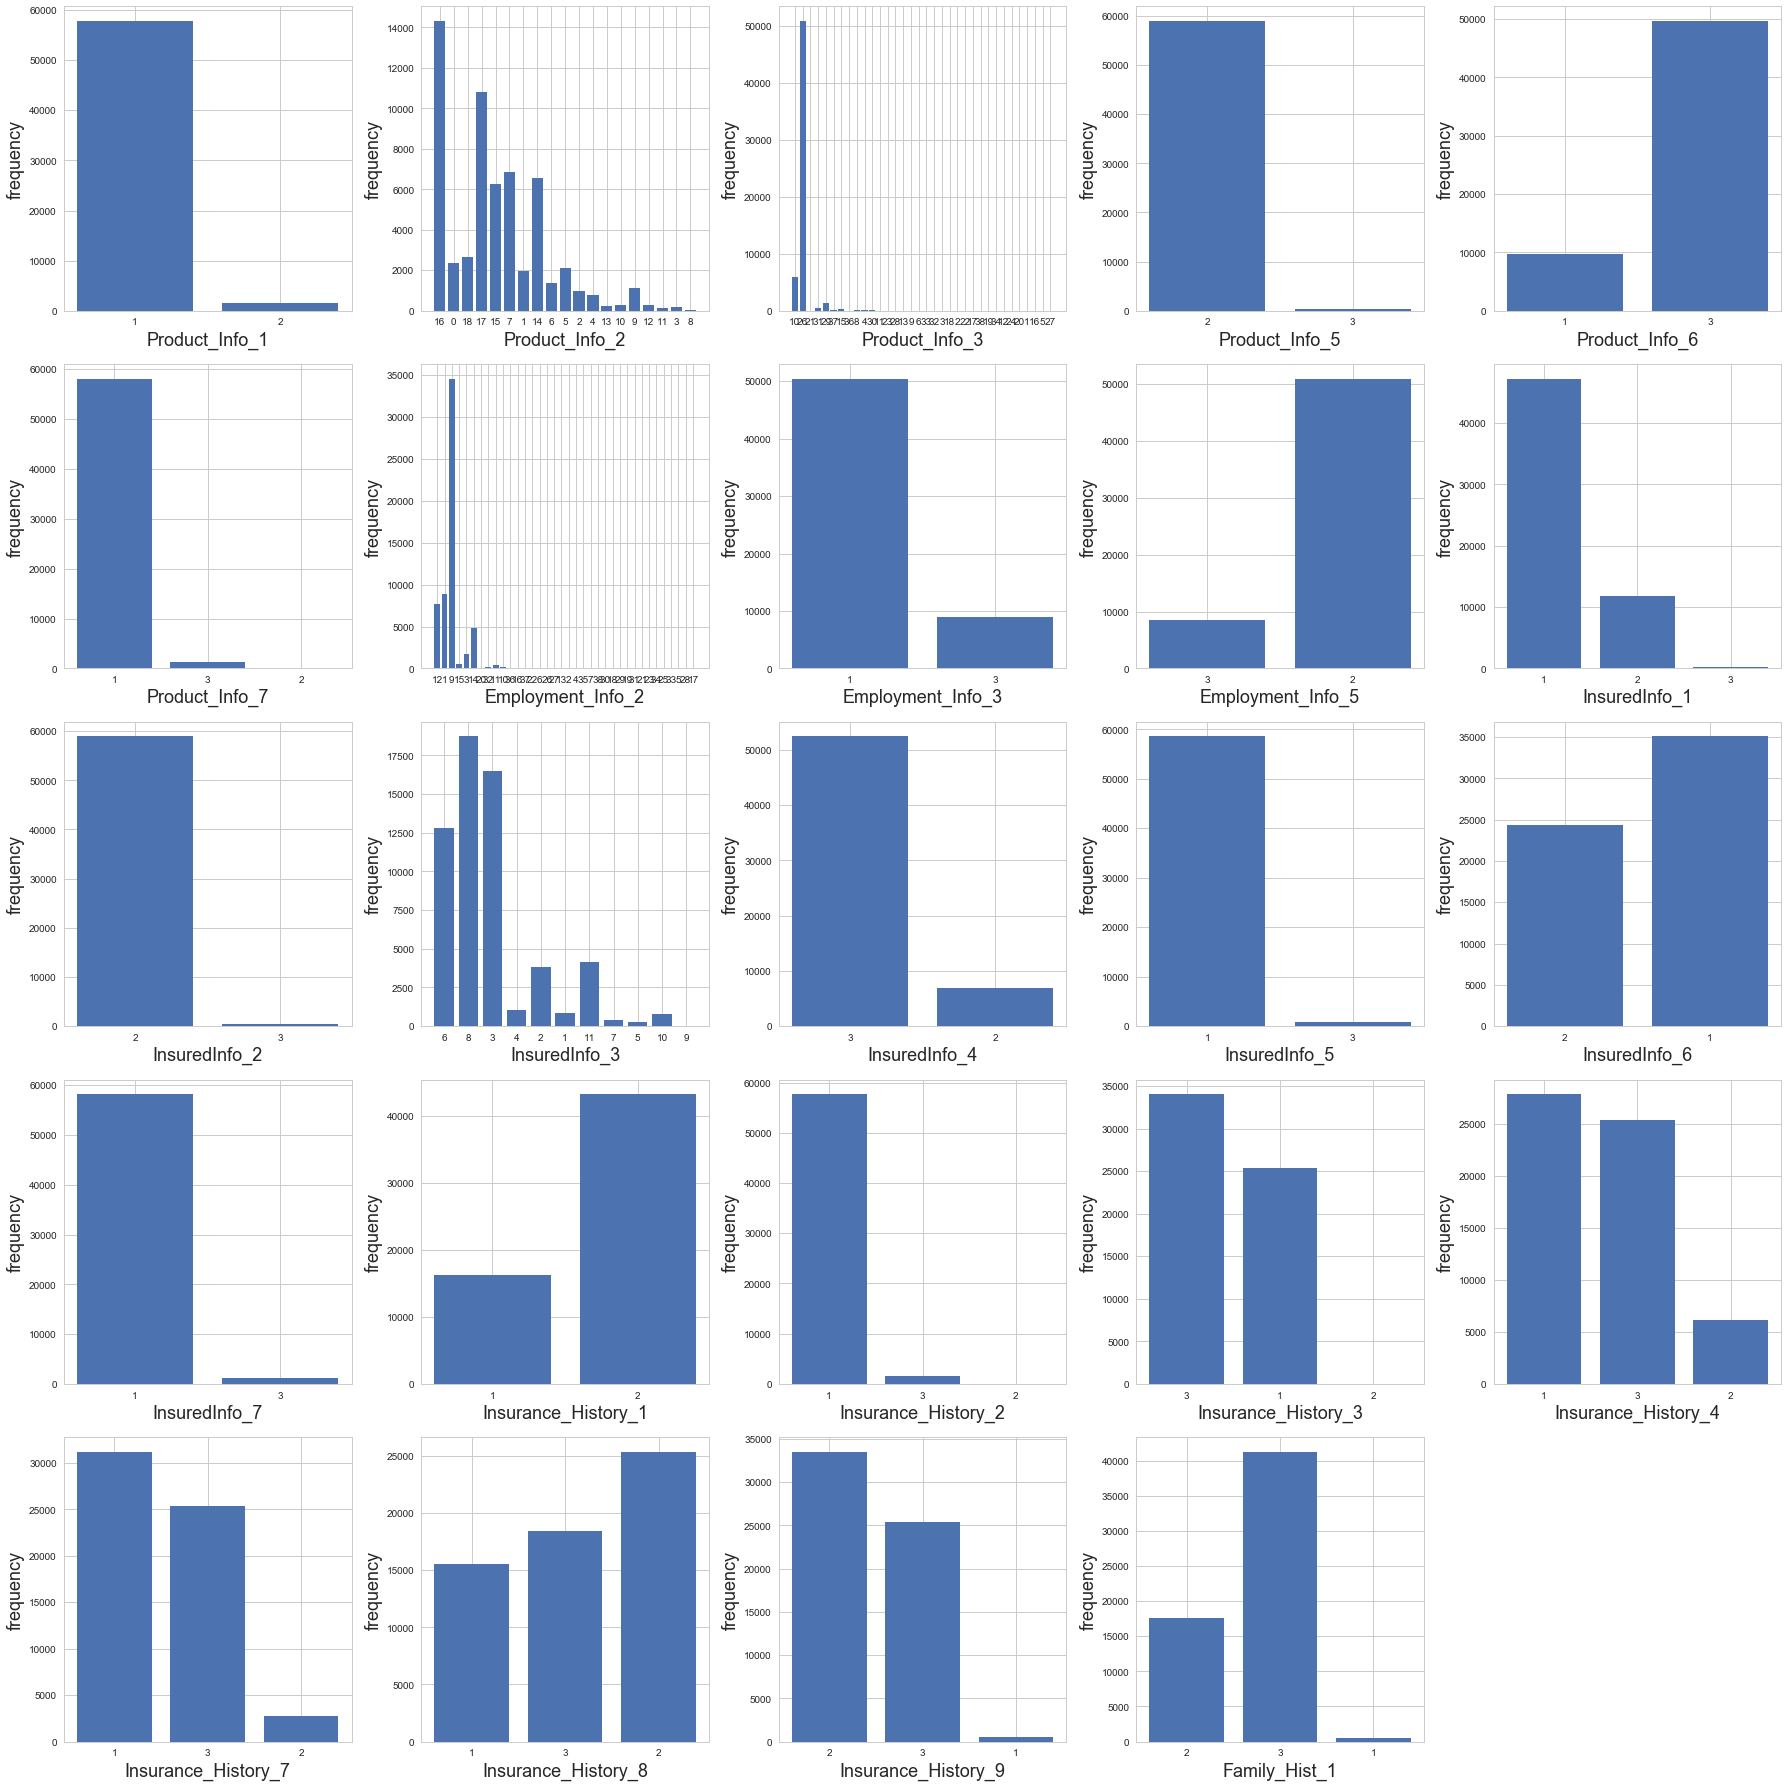

In [265]:
def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_categoricals(insurance[CATEGORICAL_COLUMNS])

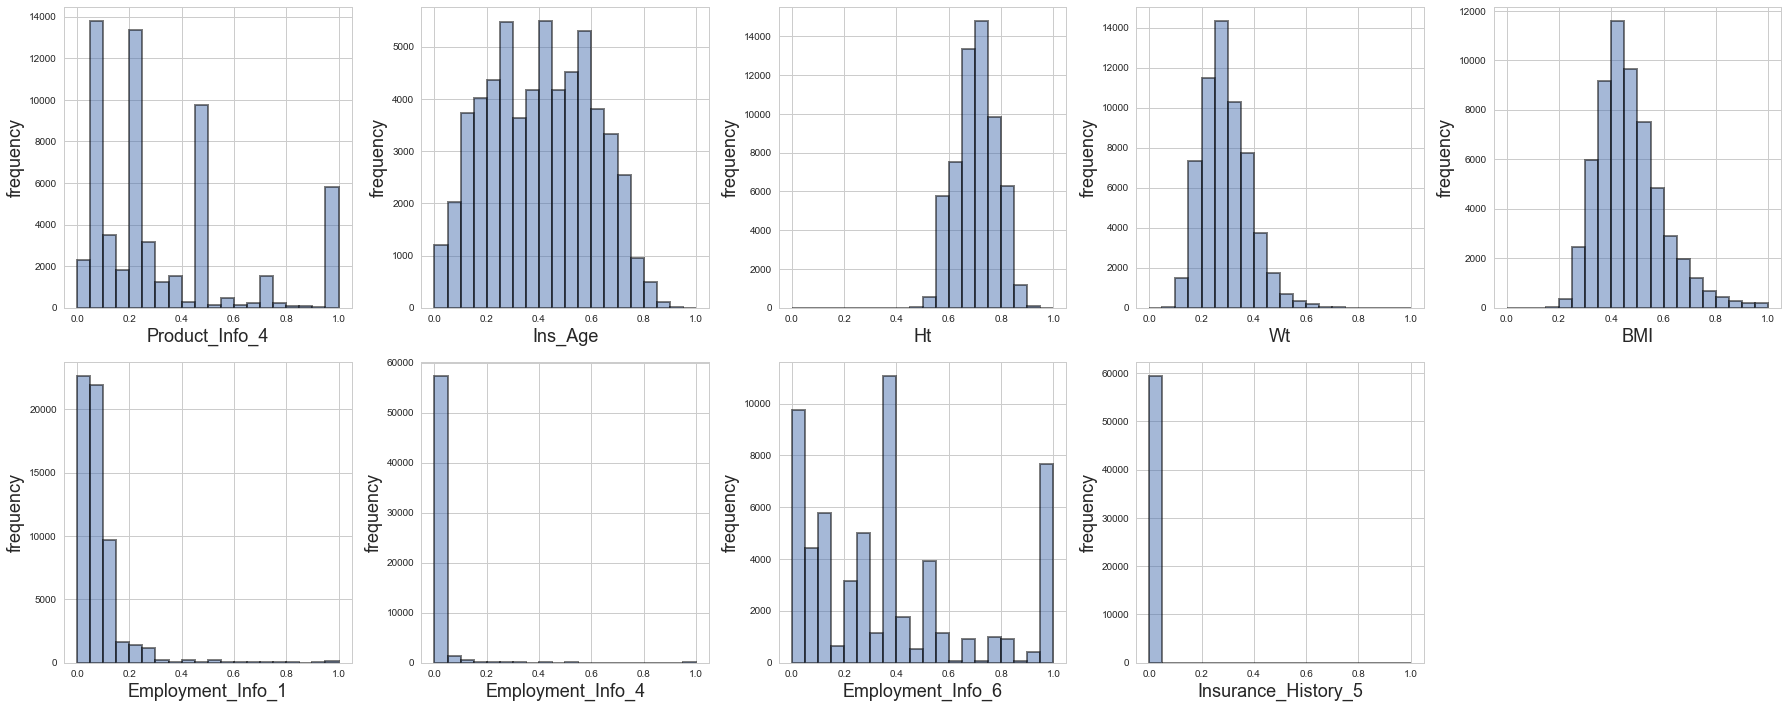

In [266]:
def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_histgrams(insurance[CONTINUOUS_COLUMNS])

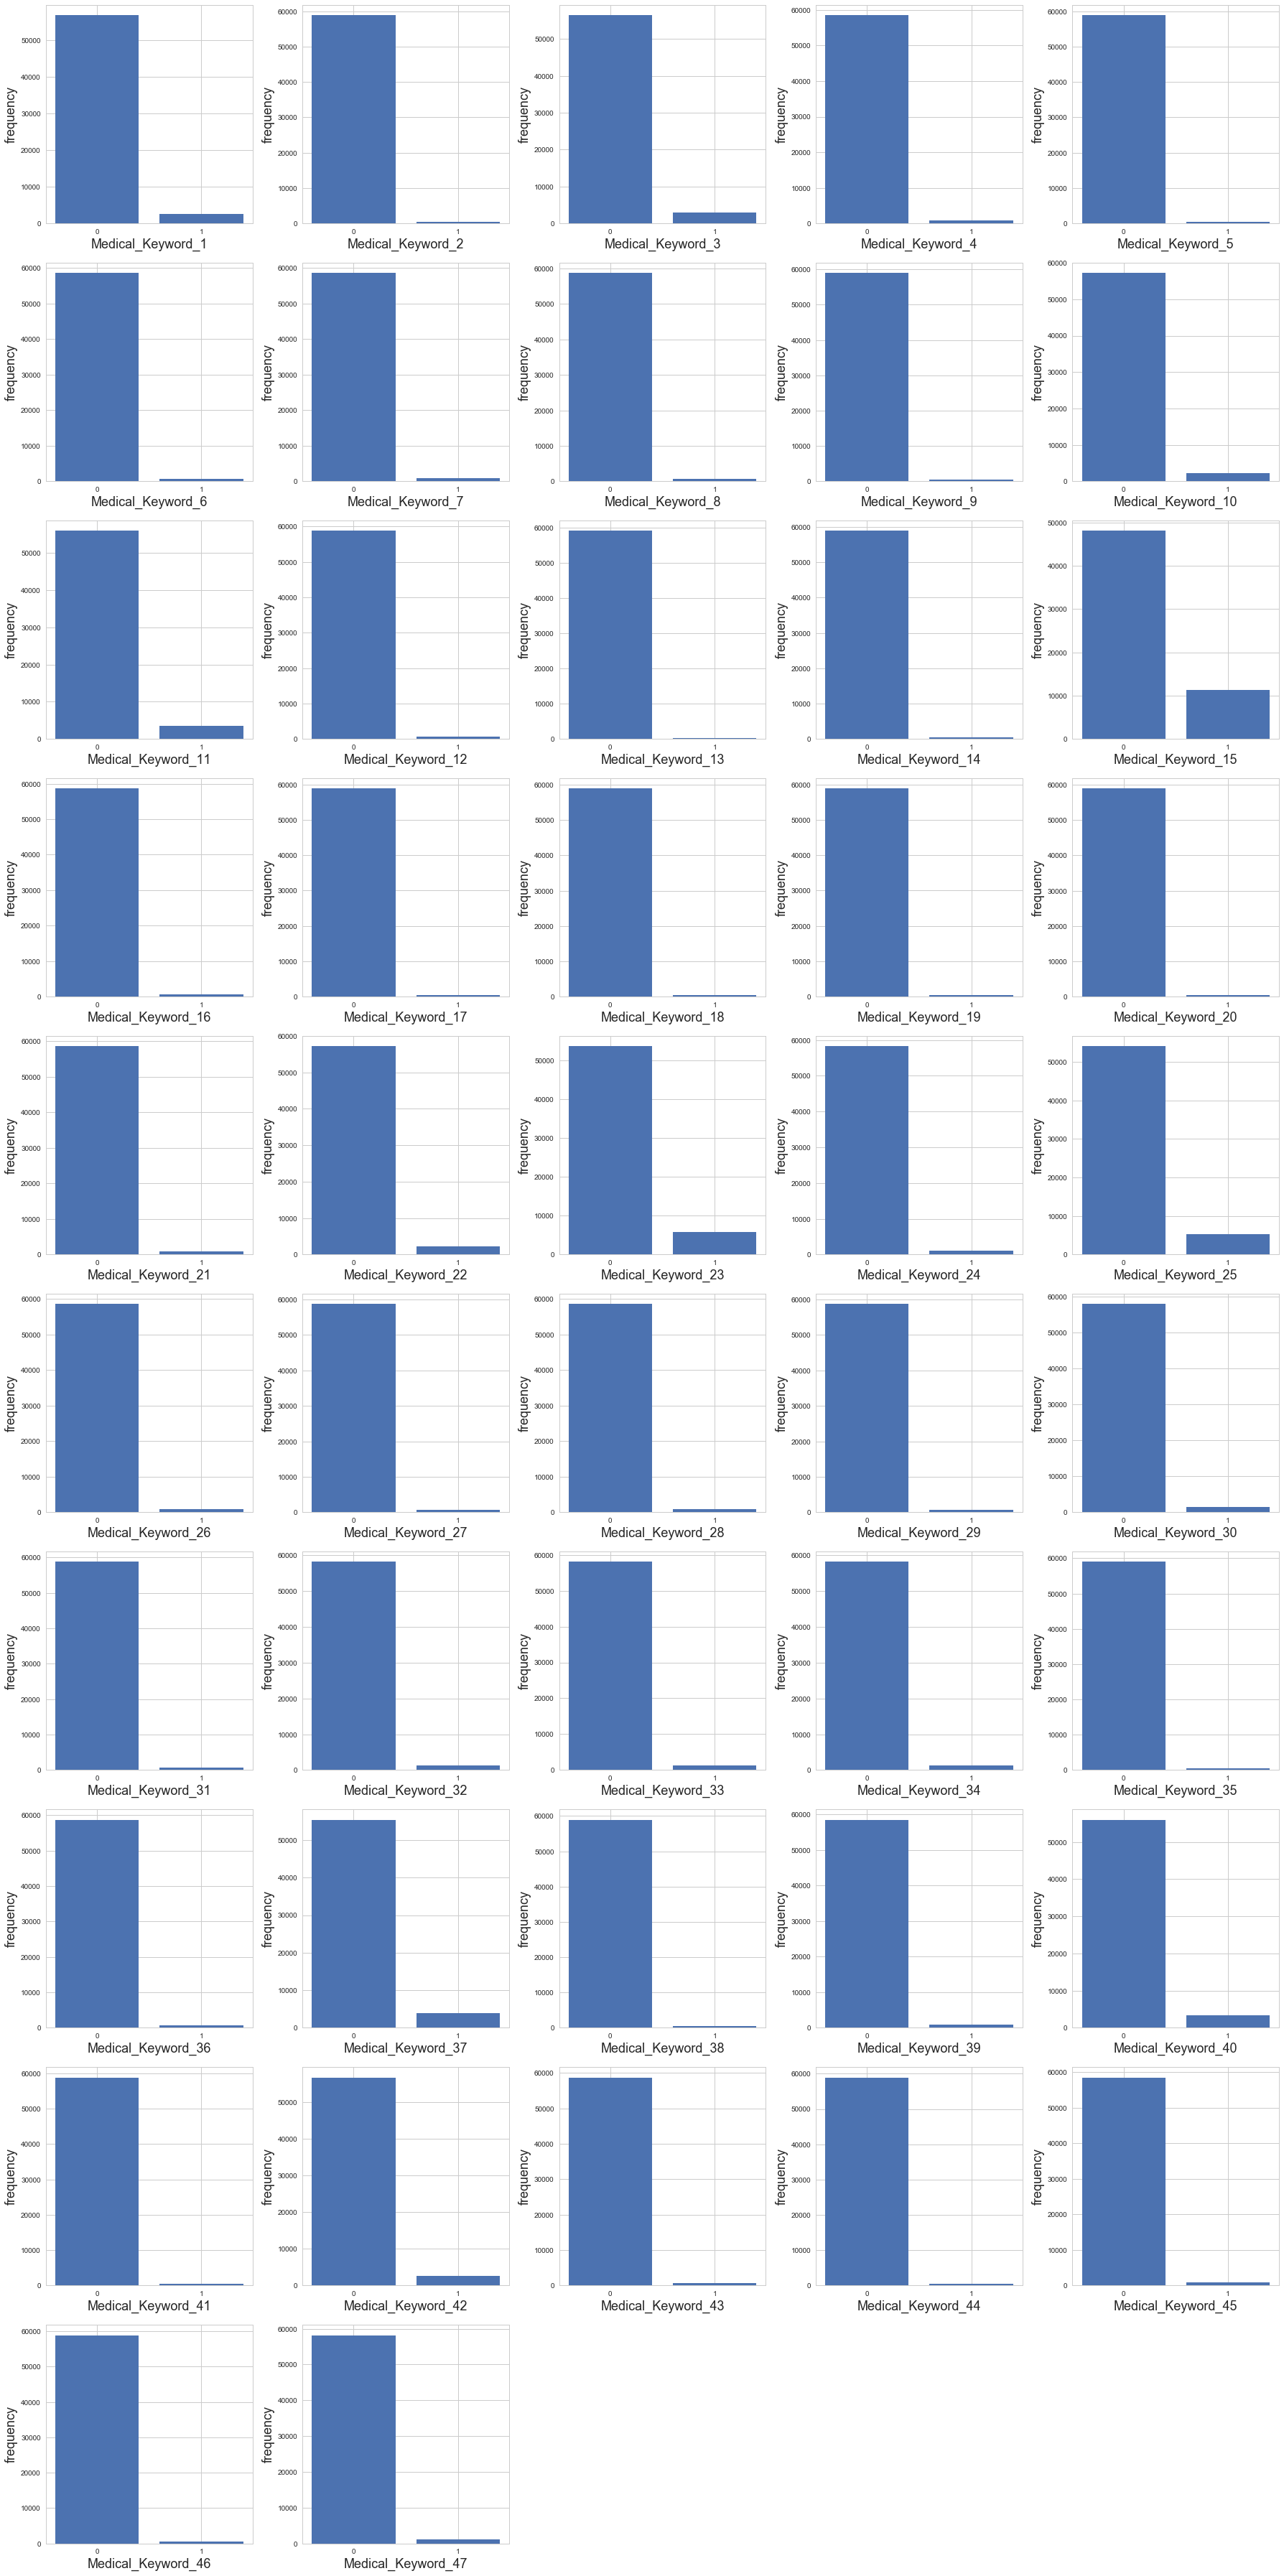

In [267]:
plot_categoricals(insurance[MEDICAL_COLUMNS])

## Correlation between variables

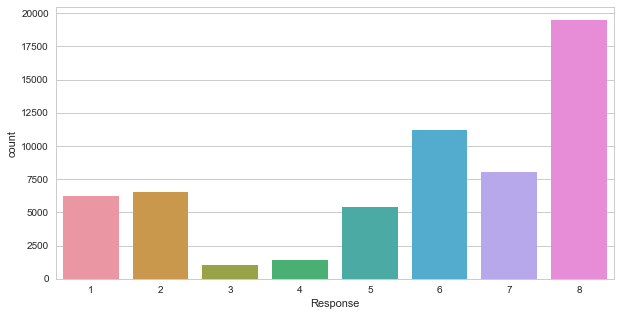

In [268]:
axis1 = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='Response',data=insurance)

### Age - Response Correlation

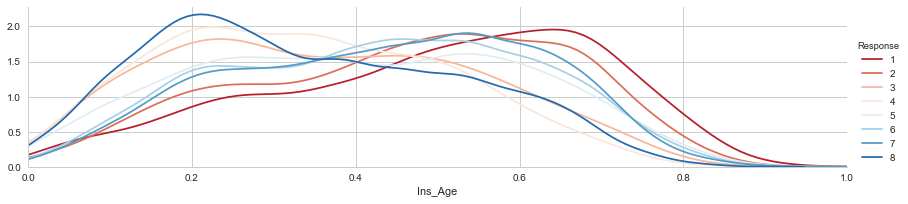

In [269]:
facet = sns.FacetGrid(insurance, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'Ins_Age')
facet.set(xlim=(0, insurance['Ins_Age'].max()))
facet.add_legend()

C:\Users\RaviRohanChaitu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


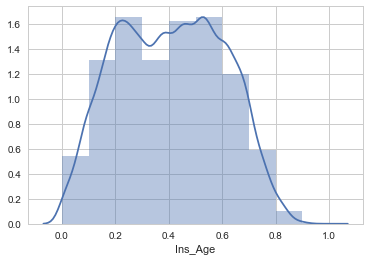

In [270]:
sns.distplot(insurance["Ins_Age"],bins=10,kde=True)

### Employment Info

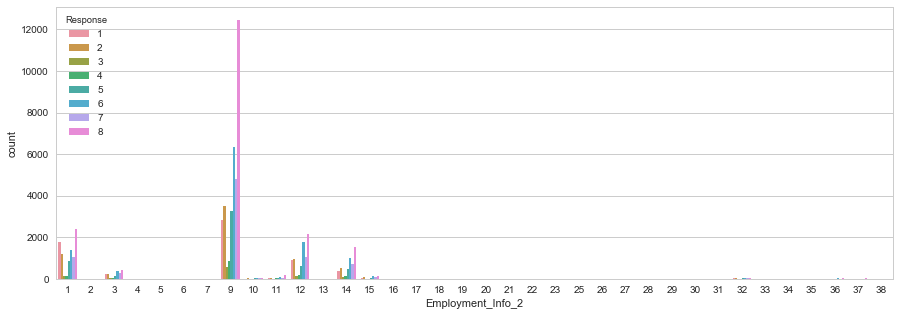

In [271]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='Employment_Info_2', hue="Response", data=insurance, ax=axis1, hue_order=range(1,9))

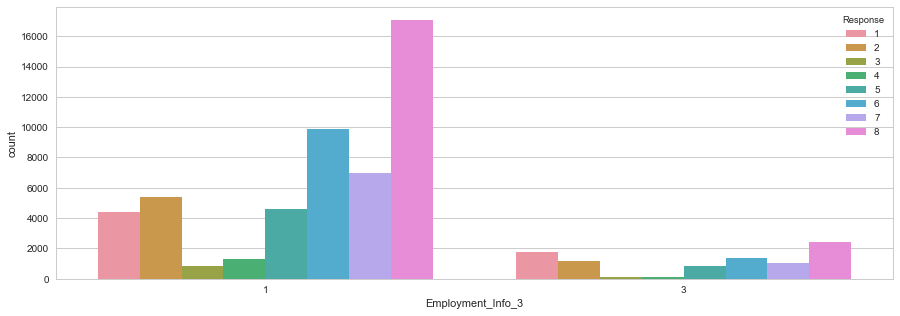

In [272]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='Employment_Info_3', hue="Response", data=insurance, ax=axis1, hue_order=range(1,9))

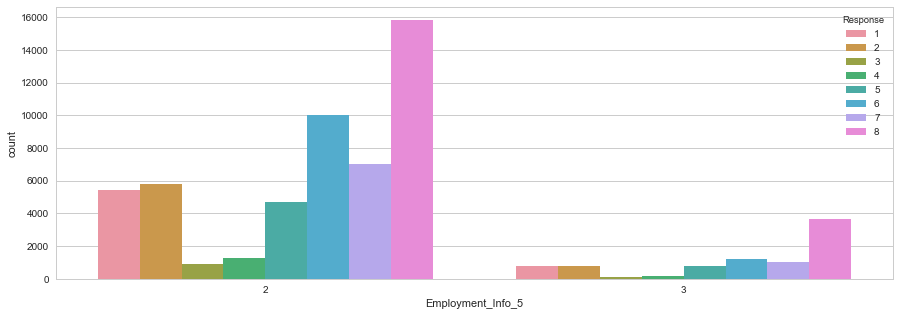

In [273]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='Employment_Info_5', hue="Response", data=insurance, ax=axis1, hue_order=range(1,9))

## Ht Wt and BMI

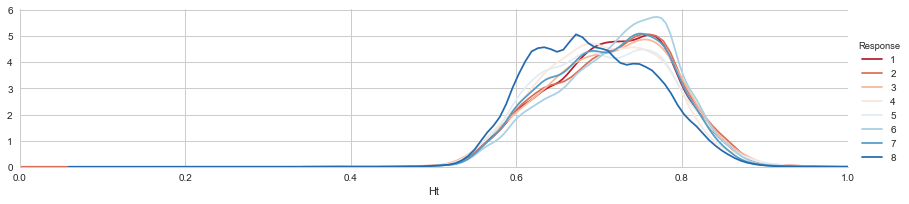

In [274]:
facet = sns.FacetGrid(insurance, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'Ht')
facet.set(xlim=(0, insurance['Ht'].max()))
facet.add_legend()

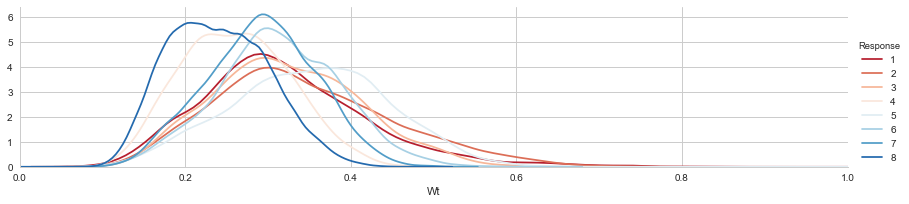

In [275]:
facet = sns.FacetGrid(insurance, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'Wt')
facet.set(xlim=(0, insurance['Wt'].max()))
facet.add_legend()

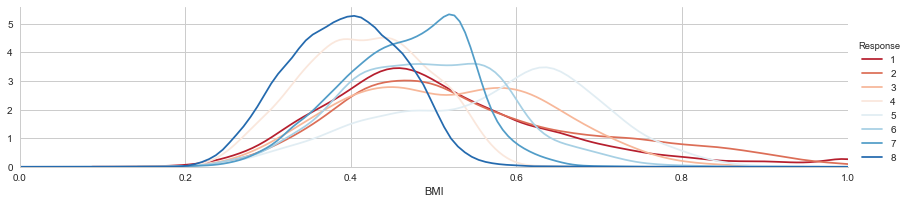

In [276]:
facet = sns.FacetGrid(insurance, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'BMI')
facet.set(xlim=(0, insurance['BMI'].max()))
facet.add_legend()

### Insurance Info

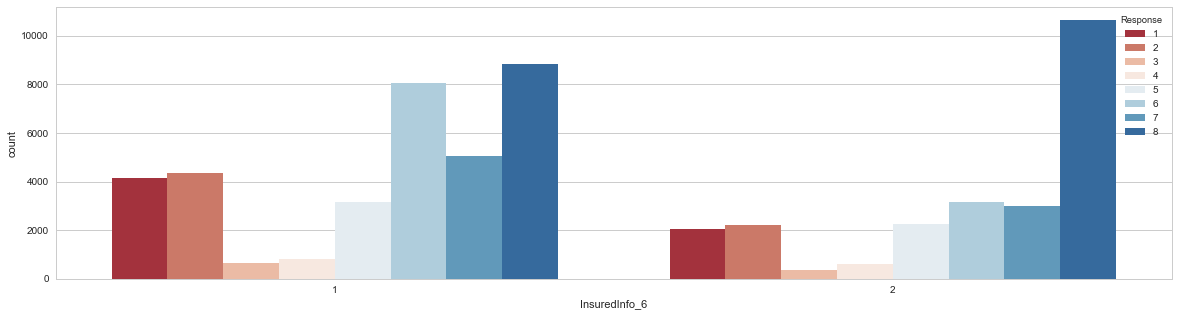

In [277]:
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
sns.countplot(x='InsuredInfo_6', hue="Response", data=insurance, 
              ax=axis1, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")

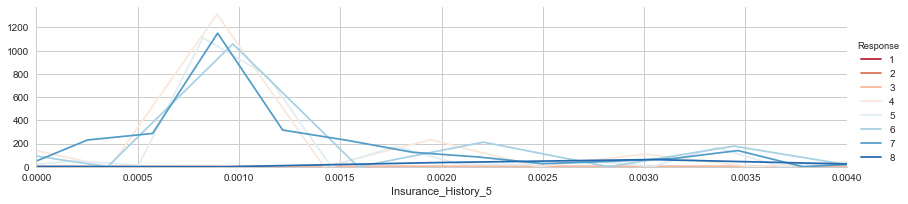

In [278]:
facet = sns.FacetGrid(insurance, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'Insurance_History_5')
facet.set(xlim=(0, 0.004))
facet.add_legend()

<a id = section4></a>

## 4. Models Comparison

#### Preparing X and y using pandas

In [279]:
X = insurance.drop(['Response'], axis=1)
X.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,2,1,16,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,0
2,6,1,18,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,0
3,7,1,17,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,0
4,8,1,15,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,0


In [280]:
y = insurance["Response"]
y.head()

0    8
1    4
2    8
3    8
4    8
Name: Response, dtype: int64

####  Spliting X and y into train and test dataset.

In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#### Checking the shape of X and y of train dataset

In [282]:
print(X_train.shape)
print(y_train.shape)

(44535, 119)
(44535,)


#### Checking the shape of X and y of test dataset

In [283]:
print(X_test.shape)
print(y_test.shape)

(14846, 119)
(14846,)


### Linear Regression

In [284]:
linreg = LinearRegression()
linreg = linreg.fit(X_train, y_train) 

In [285]:
y_pred_test = linreg.predict(X_test)

In [286]:
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for test set is {}'.format(MAE_test))

MAE for test set is 1.566757361757603


In [287]:
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for test set is {}'.format(MSE_test))

MSE for test set is 4.044326583215771


In [288]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for test set is 2.0110511140236516


In [289]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.33741830919764515 0.3320640228194379


### Logistic Regression

In [290]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

In [291]:
y_pred_train = model.predict(X_train)  
y_pred_test = model.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
print (confusion_matrix(y_test, y_pred_test))

Accuracy score for test data is: 0.33510709955543583
[[  72    0    0    0    0   47    0 1483]
 [  57    0    0    0    0   54    0 1525]
 [   3    0    0    0    0    3    0  254]
 [   3    0    0    0    0    1    0  355]
 [  26    0    0    0    0   24    0 1311]
 [  23    0    0    0    0   54    0 2694]
 [  13    0    0    0    0   25    0 1958]
 [   5    0    0    0    0    7    0 4849]]


### Decision Tree Classifier

In [292]:
param_grid = {'max_depth':range(1, 20, 2)}
DT = DecisionTreeClassifier()
clf_DT = GridSearchCV(DT, param_grid, cv = 10, scoring='accuracy', n_jobs = -1).fit(X_train,y_train)

In [293]:
y_pred = clf_DT.predict(X_test)
accuracy_score(y_test,y_pred)

0.5164354034756837

In [294]:
print('Confusion matrix for test data with DT is:\n',confusion_matrix(y_test, y_pred))

Confusion matrix for test data with DT is:
 [[ 216  196    6   14  161  402  197  410]
 [ 146  322    4   12  208  413  149  382]
 [   4   15    9   15   76  110    3   28]
 [   6    2    0   37    2  171    8  133]
 [  69  117    9    5  675  285   68  133]
 [ 103   85    1   39  135 1413  343  652]
 [  46   20    0    7    7  451  706  759]
 [  14   21    0   36   11  340  150 4289]]


### Random Forest Classifier

#### Instantiating Random Forest Classifier - Model 1 using scikit learn with default parameters. 

In [295]:
model1 = RandomForestClassifier(random_state = 0)

#### Instantiating Random Forest Classifier - Model 2 using scikit learn with:
- random_state = 0,
- max_depth = 8, 
- min_samples_leaf = 5,
- min_samples_split = 7,
- min_weight_fraction_leaf = 0.0,
- max_features = 'sqrt',
- n_estimators = 50,
- oob_score = True,
- n_jobs = -1

In [310]:
model2 = RandomForestClassifier(
                                random_state = 0,
                                max_depth = 8, 
                                min_samples_leaf = 5,
                                min_samples_split = 7,
                                min_weight_fraction_leaf = 0.0,
                                max_features = 'sqrt',
                                n_estimators = 50, 
                                oob_score = True,
                                n_jobs = -1,
                                ) 

#### Fitting the model on X_train and y_train

In [311]:
model1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [312]:
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

#### Using the model for prediction

In [313]:
prediction1 = pd.DataFrame()
prediction1 = model1.predict(X_test)

In [314]:
prediction2 = pd.DataFrame()
prediction2 = model2.predict(X_test)

<a id = section5></a>

## 5. Model evaluation 

<a id = section501></a>

### 5.1 Model evaluation using accuracy score

In [315]:
print('Accuracy score for test data with DT is:',accuracy_score(y_test, y_pred))
print('Accuracy score for test data with model 1 is:',accuracy_score(y_test, prediction1))
print('Accuracy score for test data with model 2 is:',accuracy_score(y_test, prediction2))

Accuracy score for test data with DT is: 0.5164354034756837
Accuracy score for test data with model 1 is: 0.47723292469352013
Accuracy score for test data with model 2 is: 0.4942071938569312


__Accuracy score__ of using Decision Trees is slightly greater than that of model 1 and model 2.<br/>
Lets see some other evaluation techniques, to compare the two models.

<a id = section502></a>

### 5.2 Model evaluation using confusion matrix

In [316]:
print ("================================================================")
print ("================================================================")
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_mat.index = ["Actual_{}".format(i) for i in range(1, 9)]
conf_mat.columns = ["Predicted_{}".format(i) for i in range(1, 9)]
print('Confusion matrix for test data with DT is:\n',conf_mat)
conf_mat = pd.DataFrame(confusion_matrix(y_test, prediction1))
print ("================================================================")
print ("================================================================")
conf_mat.index = ["Actual_{}".format(i) for i in range(1, 9)]
conf_mat.columns = ["Predicted_{}".format(i) for i in range(1, 9)]
print('Confusion matrix for test data with model 1 is:\n',conf_mat)
conf_mat = pd.DataFrame(confusion_matrix(y_test, prediction2))
print ("================================================================")
print ("================================================================")
conf_mat.index = ["Actual_{}".format(i) for i in range(1, 9)]
conf_mat.columns = ["Predicted_{}".format(i) for i in range(1, 9)]
print('Confusion matrix for test data with model 2 is:\n',conf_mat)
print ("================================================================")
print ("================================================================")

Confusion matrix for test data with DT is:
           Predicted_1  Predicted_2  Predicted_3  Predicted_4  Predicted_5  \
Actual_1          216          196            6           14          161   
Actual_2          146          322            4           12          208   
Actual_3            4           15            9           15           76   
Actual_4            6            2            0           37            2   
Actual_5           69          117            9            5          675   
Actual_6          103           85            1           39          135   
Actual_7           46           20            0            7            7   
Actual_8           14           21            0           36           11   

          Predicted_6  Predicted_7  Predicted_8  
Actual_1          402          197          410  
Actual_2          413          149          382  
Actual_3          110            3           28  
Actual_4          171            8          133  
Actual_5    

The confusion matrix looks little confusing.
But upon study I found that since this is not a binary data but multiclass data that has 8 level prediction; the actual vs. predicted are given per response level.
Comparing confusion matrix for the two models: 
- All the three models are close in terms of predicting the response levels
- In Model 2, there seem to be a more number of False Positives and it's getting the higher response levels(Actual 1 but Predicted 8 cases). But for Levels 3 and Level 4, there is no prediction at all. 
- In Model 1 and DT, it is more spread out with Decision Trees doing a better job

Calculating Recall and precision score for a clearer picture of the scenario.

<a id = section503></a>

### 5.3. Model evaluation using precision score

In [317]:
print ("================================================================")
print ("Averaging method is None")
print ("================================================================")
precision = precision_score(y_test,y_pred, average=None)
print('Precision score for test data using DT is:', precision)
precision1 = precision_score(y_test,prediction1, average=None)
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,prediction2, average=None)
print('Precision score for test data using model2 is:', precision2)
print ("================================================================")
print ("Averaging method is weighted")
print ("================================================================")
precision = precision_score(y_test,y_pred, average='weighted')
print('Precision score for test data using DT is:', precision)
precision1 = precision_score(y_test,prediction1, average='weighted')
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,prediction2, average='weighted')
print('Precision score for test data using model2 is:', precision2)

Averaging method is None
Precision score for test data using DT is: [0.35761589 0.41388175 0.31034483 0.22424242 0.52941176 0.39414226
 0.43472906 0.63203655]
Precision score for test data using model1 is: [0.28901734 0.30358449 0.23529412 0.20512821 0.47144006 0.36061381
 0.39013158 0.65349341]
Precision score for test data using model2 is: [0.4532967  0.41304348 0.         0.         0.54766537 0.35958005
 0.46833931 0.56287944]
Averaging method is weighted
Precision score for test data using DT is: 0.4825508797841149
Precision score for test data using model1 is: 0.45067441842648936
Precision score for test data using model2 is: 0.45902273887412237


C:\Users\RaviRohanChaitu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\RaviRohanChaitu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


__Precision score for Decision Trees is little better than that of model1 and model2 __. 

<a id = section504></a>

### 5.4 Model evaluation using recall score

In [318]:
print ("================================================================")
print ("Averaging method is None")
print ("================================================================")
print('Recall score for test data using DT is:',recall_score(y_test,y_pred, average=None))   
print('Recall score for test data using model1 is:',recall_score(y_test,prediction1, average=None))   
print('Recall score for test data using model2 is:',recall_score(y_test,prediction2, average=None))
print ("================================================================")
print ("Averaging method is weighted")
print ("================================================================")
print('Recall score for test data using DT is:',recall_score(y_test,y_pred, average='weighted'))  
print('Recall score for test data using model1 is:',recall_score(y_test,prediction1, average='weighted'))   
print('Recall score for test data using model2 is:',recall_score(y_test,prediction2, average='weighted'))


Averaging method is None
Recall score for test data using DT is: [0.13483146 0.19682152 0.03461538 0.10306407 0.49595885 0.50992422
 0.35370741 0.88232874]
Recall score for test data using model1 is: [0.24968789 0.25366748 0.04615385 0.08913649 0.43056576 0.40707326
 0.29709419 0.80621271]
Recall score for test data using model2 is: [0.10299625 0.18581907 0.         0.         0.41366642 0.49440635
 0.19639279 0.93458136]
Averaging method is weighted
Recall score for test data using DT is: 0.5164354034756837
Recall score for test data using model1 is: 0.47723292469352013
Recall score for test data using model2 is: 0.4942071938569312


Recall score of DT is more than that of model1 and model2.

<a id = section505></a>

### 5.5 Model evaluation using F1_score

In [319]:
print ("================================================================")
print ("Averaging method is None")
print ("================================================================")
print('F1_score for test data using DT is:',f1_score(y_test, y_pred, average=None))
print('F1_score for test data using model1 is:',f1_score(y_test, prediction1, average=None))
print('F1_score for test data using model2 is:',f1_score(y_test, prediction2, average=None))
print ("================================================================")
print ("Averaging method is weighted")
print ("================================================================")
print('F1_score for test data using DT is:',f1_score(y_test, y_pred, average='weighted'))
print('F1_score for test data using model1 is:',f1_score(y_test, prediction1, average='weighted'))
print('F1_score for test data using model2 is:',f1_score(y_test, prediction2, average='weighted'))

Averaging method is None
F1_score for test data using DT is: [0.19582956 0.26677713 0.06228374 0.14122137 0.51213961 0.44461926
 0.39005525 0.73649867]
F1_score for test data using model1 is: [0.26791695 0.27639028 0.07717042 0.12427184 0.4500768  0.3824377
 0.33731513 0.72186406]
F1_score for test data using model2 is: [0.16785351 0.25632378 0.         0.         0.47132692 0.4163501
 0.27673844 0.70259821]
Averaging method is weighted
F1_score for test data using DT is: 0.47856600133927224
F1_score for test data using model1 is: 0.4580767179799158
F1_score for test data using model2 is: 0.4345365002423307


C:\Users\RaviRohanChaitu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\RaviRohanChaitu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1_score for __DT__ is much __higher__ than that of model 1 and model 2.

<a id = section506a>

### 5.6 Model evaluation using ROC_AUC curve

In [320]:
def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

## Decision Tree Classifier

In [321]:
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=clf_DT.predict(X_test), 
    y_score=clf_DT.predict_proba(X_test))
print(report_with_auc)

             precision    recall  f1-score  support     pred       AUC
1             0.357616  0.134831  0.195830   1602.0    604.0  0.684566
2             0.413882  0.196822  0.266777   1636.0    778.0  0.694808
3             0.310345  0.034615  0.062284    260.0     29.0  0.796473
4             0.224242  0.103064  0.141221    359.0    165.0  0.859139
5             0.529412  0.495959  0.512140   1361.0   1275.0  0.831261
6             0.394142  0.509924  0.444619   2771.0   3585.0  0.751854
7             0.434729  0.353707  0.390055   1996.0   1624.0  0.779100
8             0.632037  0.882329  0.736499   4861.0   6786.0  0.885665
avg / total   0.482551  0.516435  0.478566  14846.0  14846.0  0.850879


## Random Forest Classifier - Model 1

In [322]:
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=model1.predict(X_test), 
    y_score=model1.predict_proba(X_test))
print(report_with_auc)

             precision    recall  f1-score  support     pred       AUC
1             0.289017  0.249688  0.267917   1602.0   1384.0  0.696414
2             0.303584  0.253667  0.276390   1636.0   1367.0  0.687318
3             0.235294  0.046154  0.077170    260.0     51.0  0.655551
4             0.205128  0.089136  0.124272    359.0    156.0  0.708952
5             0.471440  0.430566  0.450077   1361.0   1243.0  0.814211
6             0.360614  0.407073  0.382438   2771.0   3128.0  0.691889
7             0.390132  0.297094  0.337315   1996.0   1520.0  0.711612
8             0.653493  0.806213  0.721864   4861.0   5997.0  0.875152
avg / total   0.450674  0.477233  0.458077  14846.0  14846.0  0.815625


## Random Forest Classifier - Model 2

In [323]:
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=model2.predict(X_test), 
    y_score=model2.predict_proba(X_test))
print(report_with_auc)

             precision    recall  f1-score  support     pred       AUC
1             0.453297  0.102996  0.167854   1602.0    364.0  0.761084
2             0.413043  0.185819  0.256324   1636.0    736.0  0.744819
5             0.547665  0.413666  0.471327   1361.0   1028.0  0.730893
6             0.359580  0.494406  0.416350   2771.0   3810.0  0.563801
7             0.468339  0.196393  0.276738   1996.0    837.0  0.524081
8             0.562879  0.934581  0.702598   4861.0   8071.0  0.209332
avg / total   0.459023  0.494207  0.434537  14227.0  14227.0  0.849808


C:\Users\RaviRohanChaitu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<a id = section5.7></a>

## 5.7 Choosing better model using all factors

We have compared the performance of the models using various model evaluation techniques.<br/>
Our objective is to __precisely predict Response__ so that life insurance applications can be scrutinized easily. Judging all the factors including AUC, __Decision Tree Classifier model__ is __more suitable__ for this dataset. But __Random Forest Classifier Model 2__ also does a very good job.